# Homework 5 : WeatherPy using Openweathermap API and Citipy

### Analysis
Latitude vs. Max Temperature: cities closer to the equator                                              Humidity % vs. Latitude:                                                         
Cloudiness(%) vs. Latitude:
Wind Speed (mph) vs. Latitude

Caveat: Due to API retrieving current weather data and sample cities are global, time-of-day differences are not taken into account. For example, at any given point in time, noon temperature in one city will be materially different than midnight temperature of another city.

In [41]:
import openweathermapy.core as ow
from citipy import citipy as cp
import pandas as pd
import numpy as np
import random
import requests as req
import json
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [34]:
# Save config information.
api_key = "bfe8624363d9fae0c73d21055be1bfe8"  #primary api key
#api_key = "25bc90a1196e6f153eece0bc0b0fc9eb" #alternate api key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="            

### Generate Random Coordinates

In [17]:
# Create dictionary of random coordinates; testing shows that range of 1500 will give <800 unique cities from Citipy
lat = []
lon = []
random_coords = {'Latitude': lat,'Longitude': lon}
for i in range(0,1200): 
    ran_lat = random.uniform(-90, 90)
    lat.append(ran_lat)  
    ran_lon = random.uniform(-180,180)
    lon.append(ran_lon)

In [18]:
# Check number of coordinates
len(random_coords['Latitude'])

1200

In [19]:
#Create dataframe for coordinates
df = pd.DataFrame(random_coords)
df.head(3)

,Latitude,Longitude
0,88.977324,-162.077342
1,41.676037,-118.106666
2,-88.421397,8.854439


In [20]:
# Create additional colums for City, Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph)
df['City'] = ""
df['Country'] = ""
df['Temperature (F)'] = ""
df['Humidity (%)'] = ""
df['Cloudiness (%)'] = ""
df['Wind Speed (mph)'] = ""
df.head(2)

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,88.977324,-162.077342,,,,,,
1,41.676037,-118.106666,,,,,,


### Generate Cities from Random Coordinates

In [21]:
# Loop through coordinates in df with Citipy to return cities
#row_count = 1
for index, row in df.iterrows():
   
    city = cp.nearest_city((row["Latitude"]), (row["Longitude"]))
    return_city = city.city_name
    return_country = city.country_code
    
    df.set_value(index, "City", return_city)
    df.set_value(index, "Country", return_country) 
     
    # Print log to ensure loop is working correctly
    #print("Now retrieving city # " + str(row_count) + " " + return_city + ", " + return_country)
    #row_count += 1 
    
#df.head(3)

In [22]:
# Check number of unique (non-repeating) cities were generated
len(df["City"].unique())

531

In [23]:
# Visual check of duplicated cities vs unique values above
#df.sort_values("City", inplace=True)
mask=df["City"].duplicated()
df[mask].head()
#len(df[mask])

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
9,-52.825996,51.194921,taolanaro,mg,,,,
17,76.372661,-166.450809,barrow,us,,,,
26,-74.034422,-119.981785,rikitea,pf,,,,
29,-88.180404,71.291726,taolanaro,mg,,,,
34,-64.720478,124.975448,albany,au,,,,


In [28]:
# There are alot of duplicates since Citipy tries to match to random coords to nearest city
# Drop duplicates and check that results count is same as unique and reset index numbers
df.drop_duplicates(subset = ["City"], keep = 'first', inplace=True) 
df.reset_index(drop=True, inplace=True)
len(df)

531

### Perform API Calls, Print Log, and Set Data to Dataframe

In [35]:
# Create function to perform API calls, then retrieve, set, and print data for each city
def retrieve_set_data():
    print("Now retrieving Set: %s, Record: %s, City: %s: %s" %
          (str(set_count), str(index), city.title(), target_url))
            
    weather_data = [req.get(target_url).json()]
    return_temp = weather_data[0]["main"]["temp_max"]
    return_humid = weather_data[0]["main"]["humidity"]
    return_cloud = weather_data[0]["clouds"]["all"]
    return_wind = weather_data[0]["wind"]["speed"]
    return_lat = weather_data[0]["coord"]["lat"]
    return_lon = weather_data[0]["coord"]["lon"]
    
    df.set_value(index, "Temperature (F)", return_temp)
    df.set_value(index, "Humidity (%)", return_humid) 
    df.set_value(index, "Cloudiness (%)", return_cloud)
    df.set_value(index, "Wind Speed (mph)", return_wind)         
    df.set_value(index, "Latitude", return_lat)
    df.set_value(index, "Longitude", return_lon)

In [26]:
# Loop through all cities using OpenWeatherMap to return weather info
# Need to overwrite random-generated coords with actual coords since plotting random-generated lat not same as city lat
row_count = 1
set_count = 1
for index, row in df.iterrows():
    
    city = row["City"]
    target_url = (query_url + city)
    
    # Print log to ensure loop is working correctly
    # Retreive in increments include timer to mitigate exceeding API limits
    if row_count<50:
        retrieve_set_data()
        row_count += 1 
        
    else:
        retrieve_set_data()
        row_count = 1
        set_count += 1
        time.sleep(15)

Now retrieving Set: 1, Record: 0, City: Barrow: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barrow
Now retrieving Set: 1, Record: 1, City: Winnemucca: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=winnemucca
Now retrieving Set: 1, Record: 2, City: Hermanus: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hermanus
Now retrieving Set: 1, Record: 3, City: Taolanaro: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=taolanaro
Now retrieving Set: 1, Record: 4, City: Khatanga: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=khatanga
Now retrieving Set: 1, Record: 5, City: Saskylakh: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saskylakh
Now retrieving Set: 1, R

Now retrieving Set: 2, Record: 52, City: Bluff: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bluff
Now retrieving Set: 2, Record: 53, City: Leningradskiy: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=leningradskiy
Now retrieving Set: 2, Record: 54, City: Bathsheba: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bathsheba
Now retrieving Set: 2, Record: 55, City: Airai: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=airai
Now retrieving Set: 2, Record: 56, City: Raymond Terrace: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=raymond terrace
Now retrieving Set: 2, Record: 57, City: Kapaa: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kapaa
Now retrieving

Now retrieving Set: 3, Record: 103, City: Khandyga: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=khandyga
Now retrieving Set: 3, Record: 104, City: Nieuw Amsterdam: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nieuw amsterdam
Now retrieving Set: 3, Record: 105, City: Grand River South East: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=grand river south east
Now retrieving Set: 3, Record: 106, City: Hirara: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hirara
Now retrieving Set: 3, Record: 107, City: Kanash: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kanash
Now retrieving Set: 3, Record: 108, City: Santa Barbara: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&uni

Now retrieving Set: 4, Record: 152, City: Narsaq: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=narsaq
Now retrieving Set: 4, Record: 153, City: Ugoofaaru: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ugoofaaru
Now retrieving Set: 4, Record: 154, City: Xiongshi: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=xiongshi
Now retrieving Set: 4, Record: 155, City: Carballo: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=carballo
Now retrieving Set: 4, Record: 156, City: Severo-Kurilsk: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=severo-kurilsk
Now retrieving Set: 4, Record: 157, City: Ulaanbaatar: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ulaanbaatar


Now retrieving Set: 5, Record: 203, City: Inuvik: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=inuvik
Now retrieving Set: 5, Record: 204, City: Siirt: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=siirt
Now retrieving Set: 5, Record: 205, City: Road Town: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=road town
Now retrieving Set: 5, Record: 206, City: Tiksi: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tiksi
Now retrieving Set: 5, Record: 207, City: Tenkasi: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tenkasi
Now retrieving Set: 5, Record: 208, City: Krasnyy Chikoy: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=krasnyy chikoy
Now retrieving Set: 

Now retrieving Set: 6, Record: 254, City: Cam Ranh: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cam ranh
Now retrieving Set: 6, Record: 255, City: Catia La Mar: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=catia la mar
Now retrieving Set: 6, Record: 256, City: Panchgani: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=panchgani
Now retrieving Set: 6, Record: 257, City: Vao: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vao
Now retrieving Set: 6, Record: 258, City: Clarence Town: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=clarence town
Now retrieving Set: 6, Record: 259, City: Glebychevo: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=glebychevo
No

Now retrieving Set: 7, Record: 305, City: San Carlos De Bariloche: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san carlos de bariloche
Now retrieving Set: 7, Record: 306, City: San Andres: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san andres
Now retrieving Set: 7, Record: 307, City: Arrecife: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=arrecife
Now retrieving Set: 7, Record: 308, City: Bonoua: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bonoua
Now retrieving Set: 7, Record: 309, City: Sinnamary: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sinnamary
Now retrieving Set: 7, Record: 310, City: Praia: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperia

Now retrieving Set: 8, Record: 355, City: Yellowknife: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yellowknife
Now retrieving Set: 8, Record: 356, City: Pousat: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pousat
Now retrieving Set: 8, Record: 357, City: Sarangani: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sarangani
Now retrieving Set: 8, Record: 358, City: Batagay-Alyta: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=batagay-alyta
Now retrieving Set: 8, Record: 359, City: Gardiner: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gardiner
Now retrieving Set: 8, Record: 360, City: Pailon: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pailon
Now re

Now retrieving Set: 9, Record: 405, City: Urshelskiy: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=urshelskiy
Now retrieving Set: 9, Record: 406, City: Constantine: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=constantine
Now retrieving Set: 9, Record: 407, City: Canutama: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=canutama
Now retrieving Set: 9, Record: 408, City: Beloha: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=beloha
Now retrieving Set: 9, Record: 409, City: Saint George: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint george
Now retrieving Set: 9, Record: 410, City: Bandarbeyla: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bandarbe

Now retrieving Set: 10, Record: 457, City: Basoko: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=basoko
Now retrieving Set: 10, Record: 458, City: Escalerillas: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=escalerillas
Now retrieving Set: 10, Record: 459, City: Port Hawkesbury: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port hawkesbury
Now retrieving Set: 10, Record: 460, City: Bichura: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bichura
Now retrieving Set: 10, Record: 461, City: Sangar: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sangar
Now retrieving Set: 10, Record: 462, City: Labytnangi: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=labyt

Now retrieving Set: 11, Record: 508, City: Konevo: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=konevo
Now retrieving Set: 11, Record: 509, City: Korla: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=korla
Now retrieving Set: 11, Record: 510, City: Samagaltay: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=samagaltay
Now retrieving Set: 11, Record: 511, City: La Ferte-Bernard: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=la ferte-bernard
Now retrieving Set: 11, Record: 512, City: Nelson Bay: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nelson bay
Now retrieving Set: 11, Record: 513, City: Belushya Guba: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=

In [30]:
df.head()

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,71.29,-156.79,barrow,us,37.4,93,90,16.11
1,40.97,-117.74,winnemucca,us,64.4,42,1,3.36
2,-34.42,19.23,hermanus,za,49.51,100,100,2.37
3,-25.02,46.97,taolanaro,mg,66.2,88,40,6.06
4,71.97,102.50,khatanga,ru,40.15,88,56,16.02


### Save Dataframe to CSV File

In [37]:
df.to_csv("random_city_weather_data.csv", encoding="utf-8", index=False)

### Latitude vs. Temperature Plot

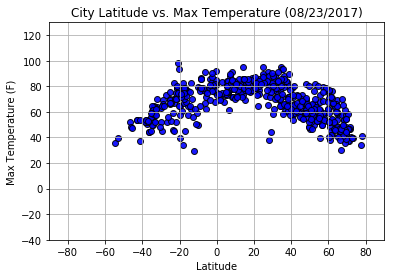

In [50]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], 
            df["Temperature (F)"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (08/23/2017)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-40, 130])

# Save the figure
plt.savefig("latitude_vs_temp.png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

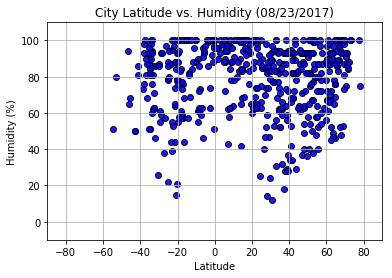

In [51]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], 
            df["Humidity (%)"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (08/23/2017)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("latitude_vs_humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

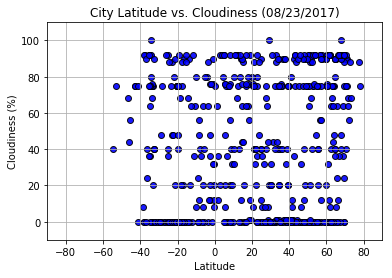

In [52]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], 
            df["Cloudiness (%)"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (08/23/2017)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("latitude_vs_cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

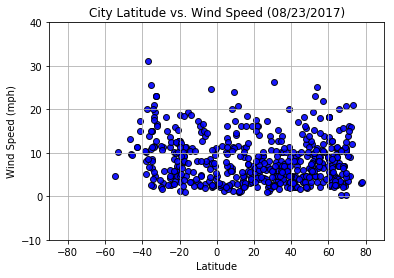

In [54]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], 
            df["Wind Speed (mph)"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (08/23/2017)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10, 40])

# Save the figure
plt.savefig("latitude_vs_wind.png")

# Show plot
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xlim'

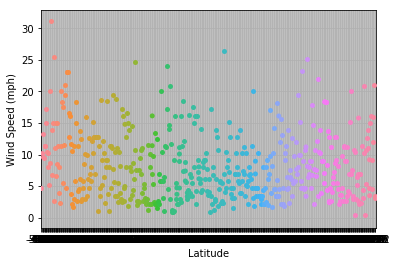

In [59]:
plt = sns.stripplot(x="Latitude", y="Wind Speed (mph)", data=df, jitter=True);
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10, 40])